# Análisis Detallado: Modelo All Biomarkers
## Visualizaciones y Análisis para el TFM

Este notebook genera gráficos profesionales y análisis estadísticos del mejor modelo (All Biomarkers con LEFT JOIN) para incluir en la memoria del TFM.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib.patches import Rectangle

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


## 1. Cargar Resultados de Todos los Modelos

In [3]:
with open('baseline_demographics_results.json', 'r') as f:
    baseline = json.load(f)

with open('enhanced_biomarkers_results.json', 'r') as f:
    csf_imputed = json.load(f)

with open('real_biomarkers_results.json', 'r') as f:
    csf_real = json.load(f)

with open('all_biomarkers_results.json', 'r') as f:
    all_biomarkers = json.load(f)

print("✅ Resultados cargados:")
print(f"  Baseline: Test MAE = {baseline['test_mae']:.3f} años")
print(f"  CSF Imputed: Test MAE = {csf_imputed['test_mae']:.3f} años")
print(f"  CSF Real: Test MAE = {csf_real['test_mae']:.3f} años")
print(f"  All Biomarkers: Test MAE = {all_biomarkers['test_mae']:.3f} años")

✅ Resultados cargados:
  Baseline: Test MAE = 0.083 años
  CSF Imputed: Test MAE = 0.103 años
  CSF Real: Test MAE = 0.088 años
  All Biomarkers: Test MAE = 0.064 años


## 2. Gráfico 1: Comparación de Métricas (MAE y RMSE)

C:\Users\merit\AppData\Local\Temp\ipykernel_10376\3061339990.py:35: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\merit\AppData\Local\Temp\ipykernel_10376\3061339990.py:36: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.savefig('all_biomarkers_comparison.png', dpi=300, bbox_inches='tight')
d:\VSCode\tfm-gnn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


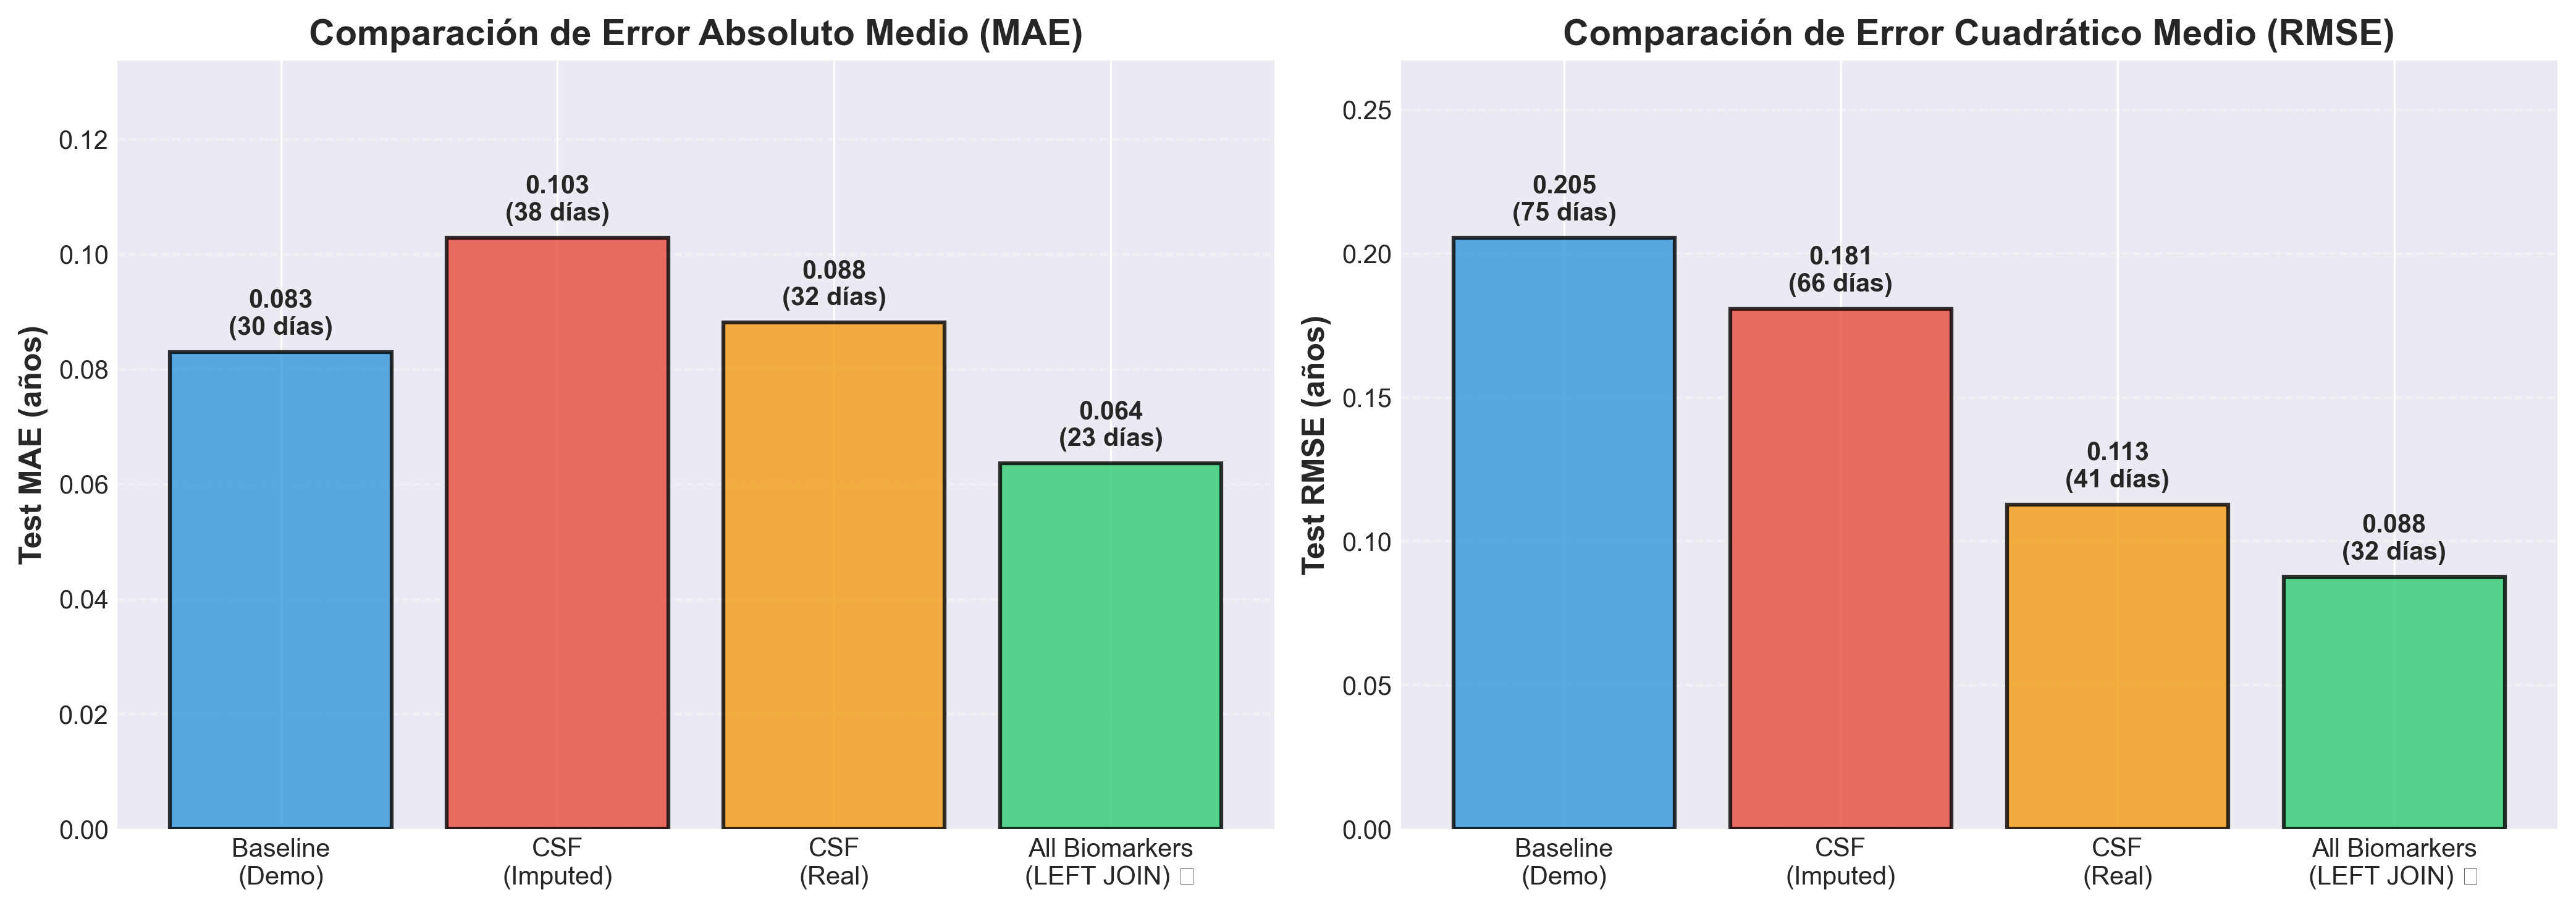


✅ Gráfico guardado: all_biomarkers_comparison.png


In [4]:
models = ['Baseline\n(Demo)', 'CSF\n(Imputed)', 'CSF\n(Real)', 'All Biomarkers\n(LEFT JOIN) ⭐']
mae_values = [baseline['test_mae'], csf_imputed['test_mae'], csf_real['test_mae'], all_biomarkers['test_mae']]
rmse_values = [baseline['test_rmse'], csf_imputed['test_rmse'], csf_real['test_rmse'], all_biomarkers['test_rmse']]
colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bars1 = axes[0].bar(models, mae_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Test MAE (años)', fontsize=12, fontweight='bold')
axes[0].set_title('Comparación de Error Absoluto Medio (MAE)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].set_ylim(0, max(mae_values) * 1.3)

for bar, val in zip(bars1, mae_values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + max(mae_values)*0.02,
                f'{val:.3f}\n({val*365:.0f} días)',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2 = axes[1].bar(models, rmse_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Test RMSE (años)', fontsize=12, fontweight='bold')
axes[1].set_title('Comparación de Error Cuadrático Medio (RMSE)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].set_ylim(0, max(rmse_values) * 1.3)

for bar, val in zip(bars2, rmse_values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + max(rmse_values)*0.02,
                f'{val:.3f}\n({val*365:.0f} días)',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('all_biomarkers_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: all_biomarkers_comparison.png")

## 3. Gráfico 2: Mejora Porcentual vs Baseline

C:\Users\merit\AppData\Local\Temp\ipykernel_10376\358383177.py:26: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\merit\AppData\Local\Temp\ipykernel_10376\358383177.py:27: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.savefig('all_biomarkers_improvement.png', dpi=300, bbox_inches='tight')


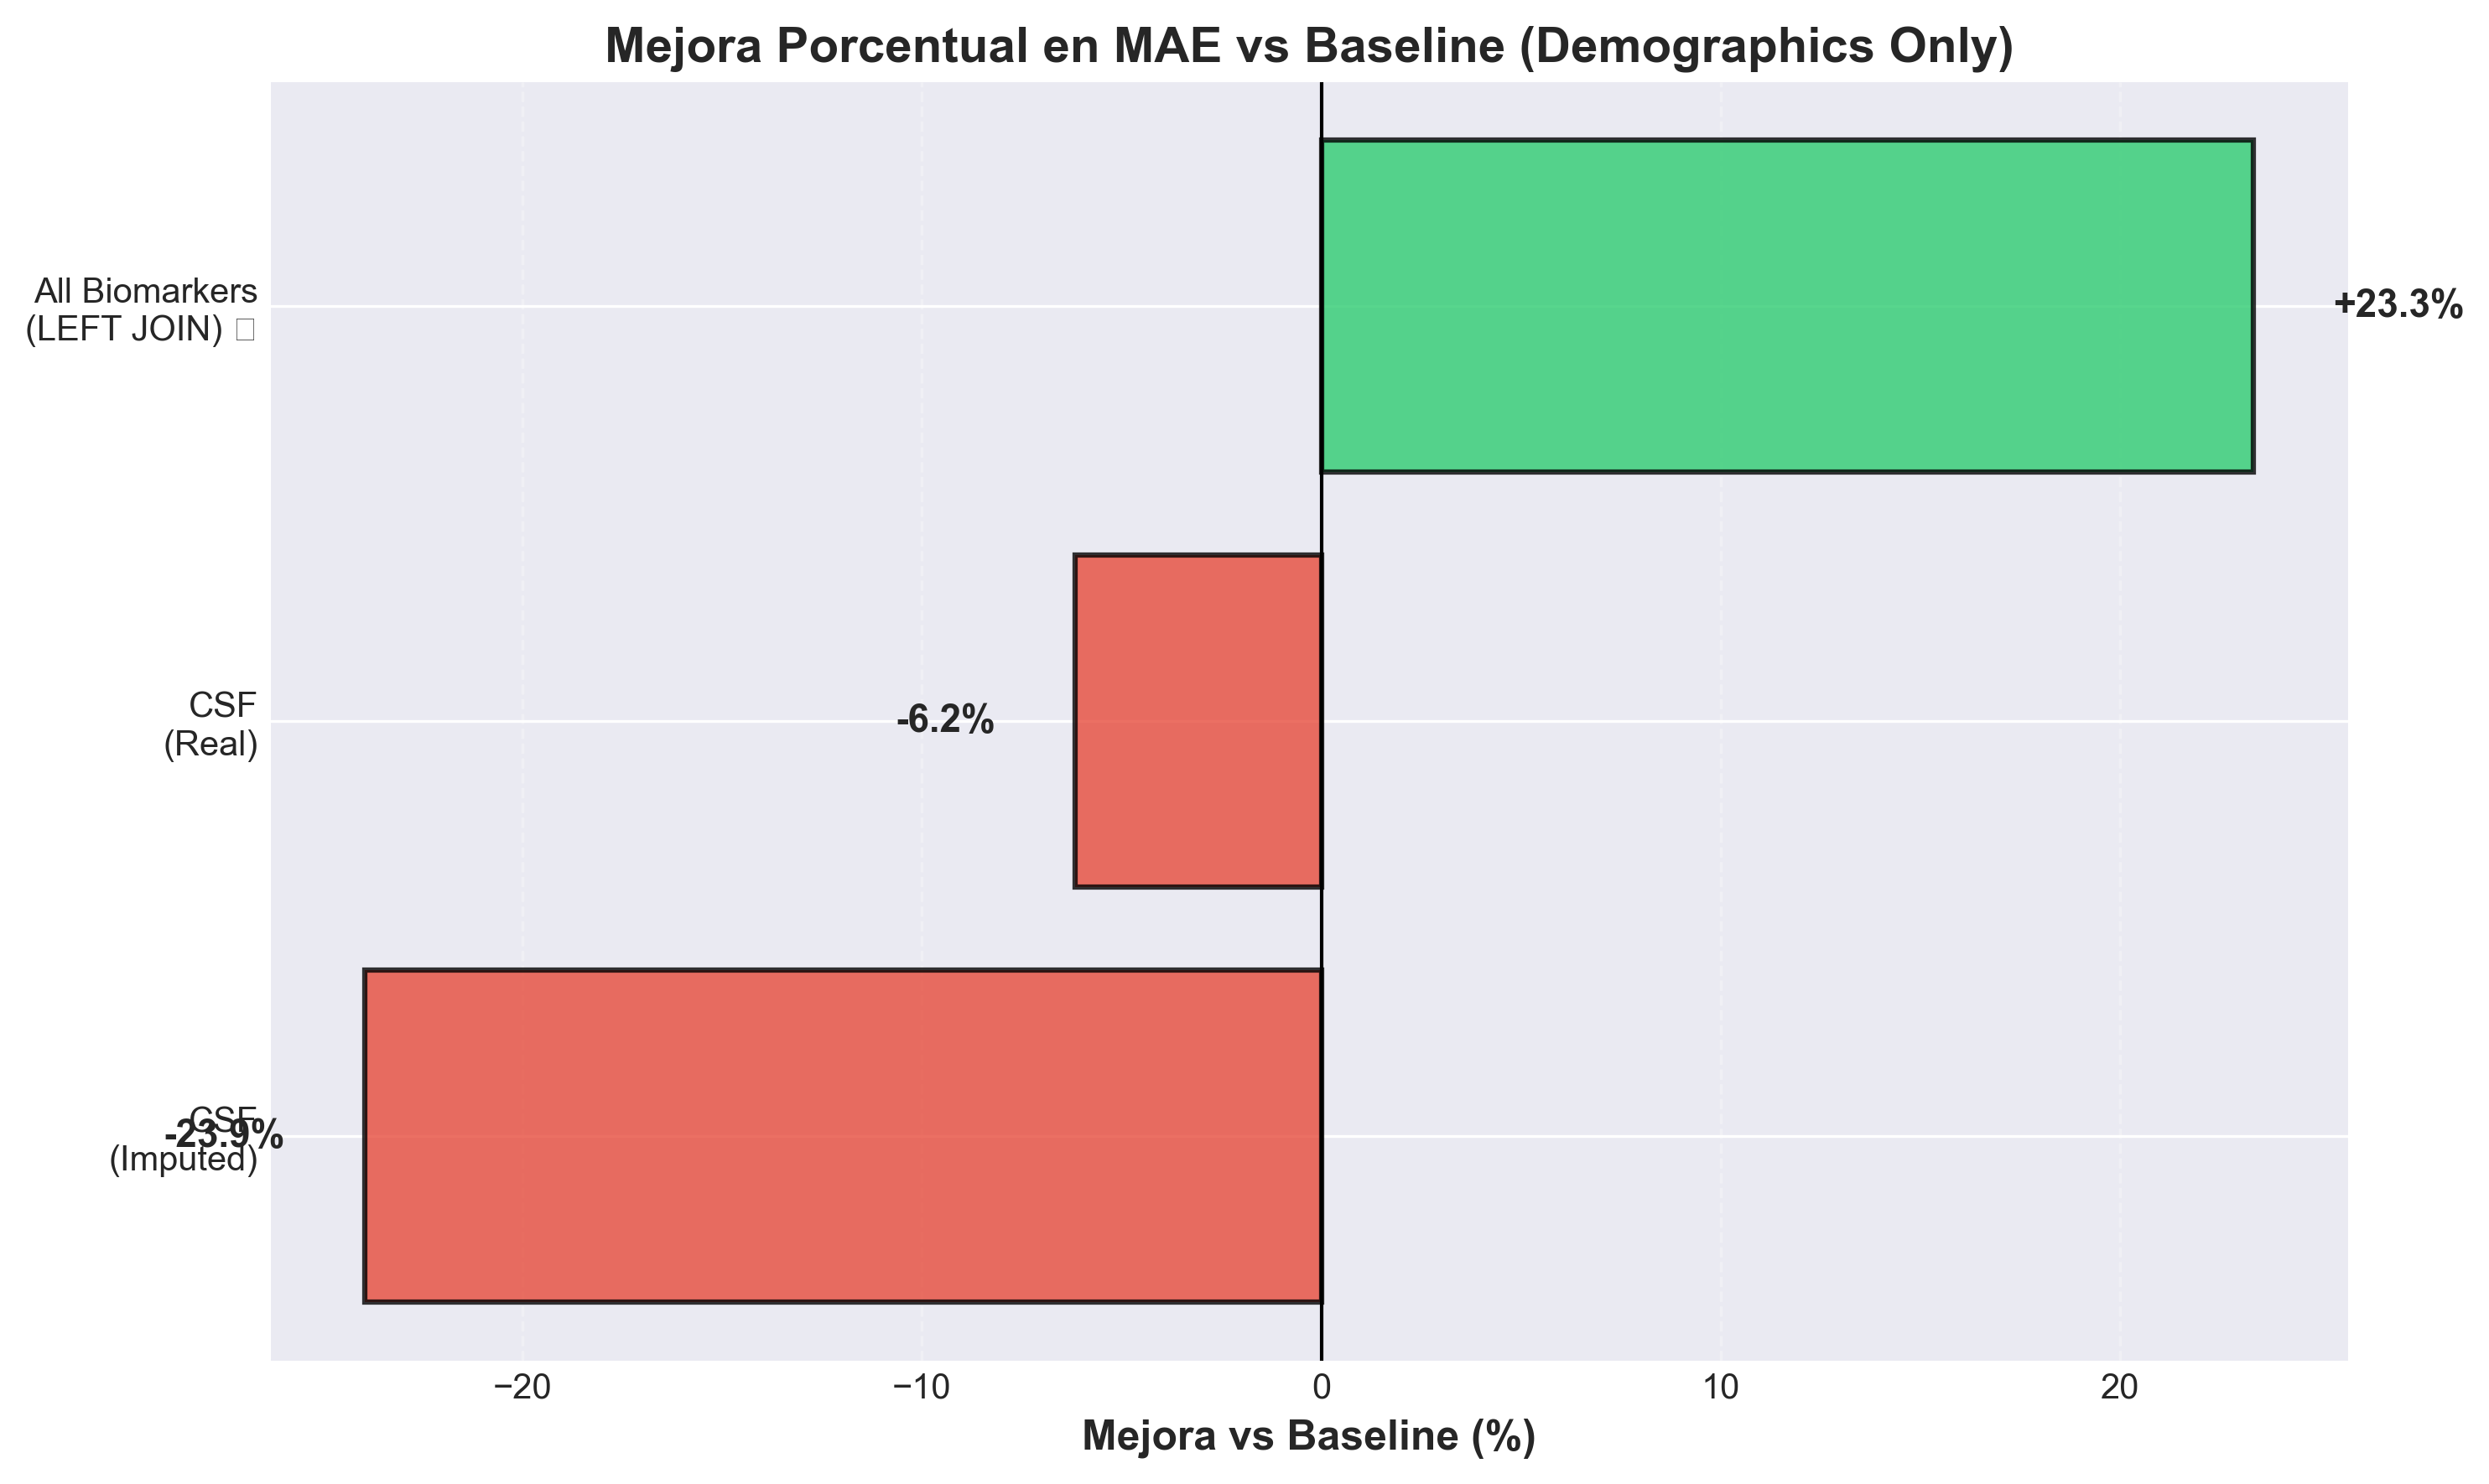


✅ Gráfico guardado: all_biomarkers_improvement.png


In [5]:
improvements = {
    'CSF\n(Imputed)': ((baseline['test_mae'] - csf_imputed['test_mae']) / baseline['test_mae']) * 100,
    'CSF\n(Real)': ((baseline['test_mae'] - csf_real['test_mae']) / baseline['test_mae']) * 100,
    'All Biomarkers\n(LEFT JOIN) ⭐': ((baseline['test_mae'] - all_biomarkers['test_mae']) / baseline['test_mae']) * 100
}

fig, ax = plt.subplots(figsize=(10, 6))

models_imp = list(improvements.keys())
values_imp = list(improvements.values())
colors_imp = ['#e74c3c' if v < 0 else '#2ecc71' for v in values_imp]

bars = ax.barh(models_imp, values_imp, color=colors_imp, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Mejora vs Baseline (%)', fontsize=12, fontweight='bold')
ax.set_title('Mejora Porcentual en MAE vs Baseline (Demographics Only)', fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=1, linestyle='-')
ax.grid(axis='x', alpha=0.3, linestyle='--')

for bar, val in zip(bars, values_imp):
    width = bar.get_width()
    ax.text(width + (2 if width > 0 else -2), bar.get_y() + bar.get_height()/2.,
           f'{val:+.1f}%',
           ha='left' if width > 0 else 'right', va='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('all_biomarkers_improvement.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: all_biomarkers_improvement.png")

## 4. Gráfico 3: Cobertura de Biomarcadores

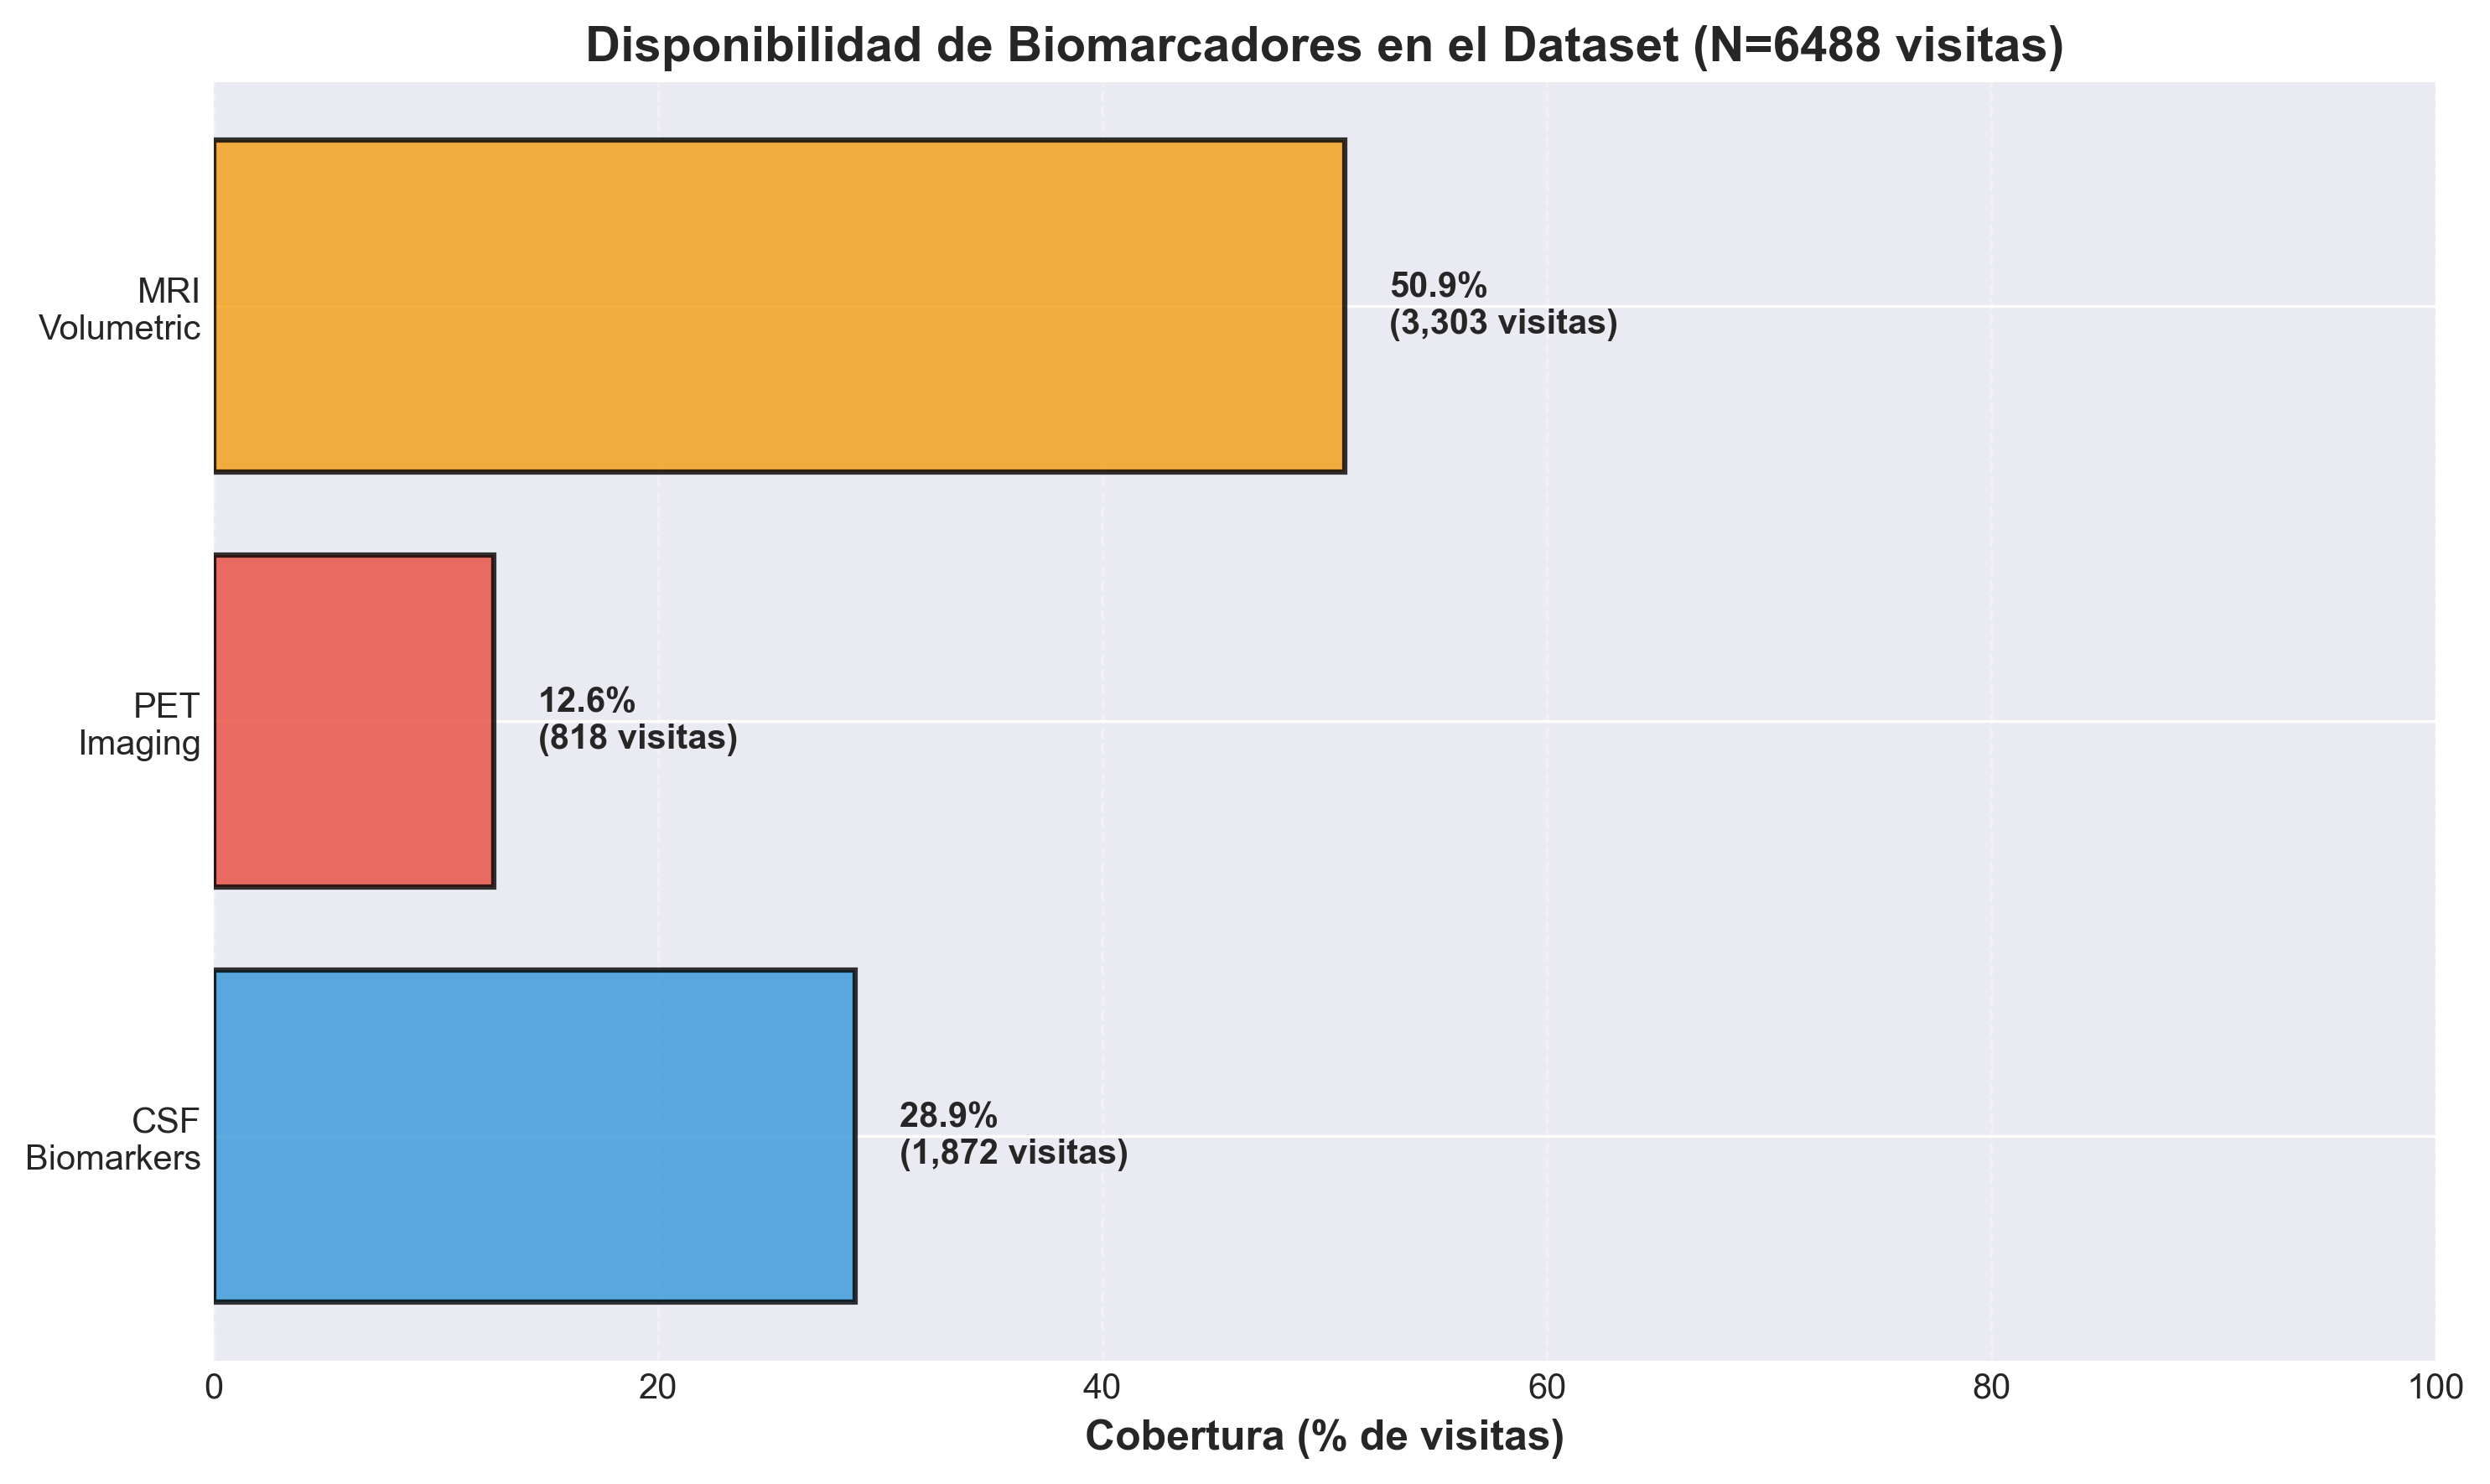


✅ Gráfico guardado: all_biomarkers_coverage.png


In [6]:
biomarkers = ['CSF\nBiomarkers', 'PET\nImaging', 'MRI\nVolumetric']
coverage = [
    all_biomarkers['csf_coverage'] * 100,
    all_biomarkers['pet_coverage'] * 100,
    all_biomarkers['mri_coverage'] * 100
]
n_visits = all_biomarkers['n_visits']

fig, ax = plt.subplots(figsize=(10, 6))

colors_bio = ['#3498db', '#e74c3c', '#f39c12']
bars = ax.barh(biomarkers, coverage, color=colors_bio, alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Cobertura (% de visitas)', fontsize=12, fontweight='bold')
ax.set_title(f'Disponibilidad de Biomarcadores en el Dataset (N={n_visits} visitas)', fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for bar, val in zip(bars, coverage):
    width = bar.get_width()
    n_available = int(n_visits * val / 100)
    ax.text(width + 2, bar.get_y() + bar.get_height()/2.,
           f'{val:.1f}%\n({n_available:,} visitas)',
           ha='left', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('all_biomarkers_coverage.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: all_biomarkers_coverage.png")

## 5. Gráfico 4: Evolución del Error por Split (Train/Val/Test)

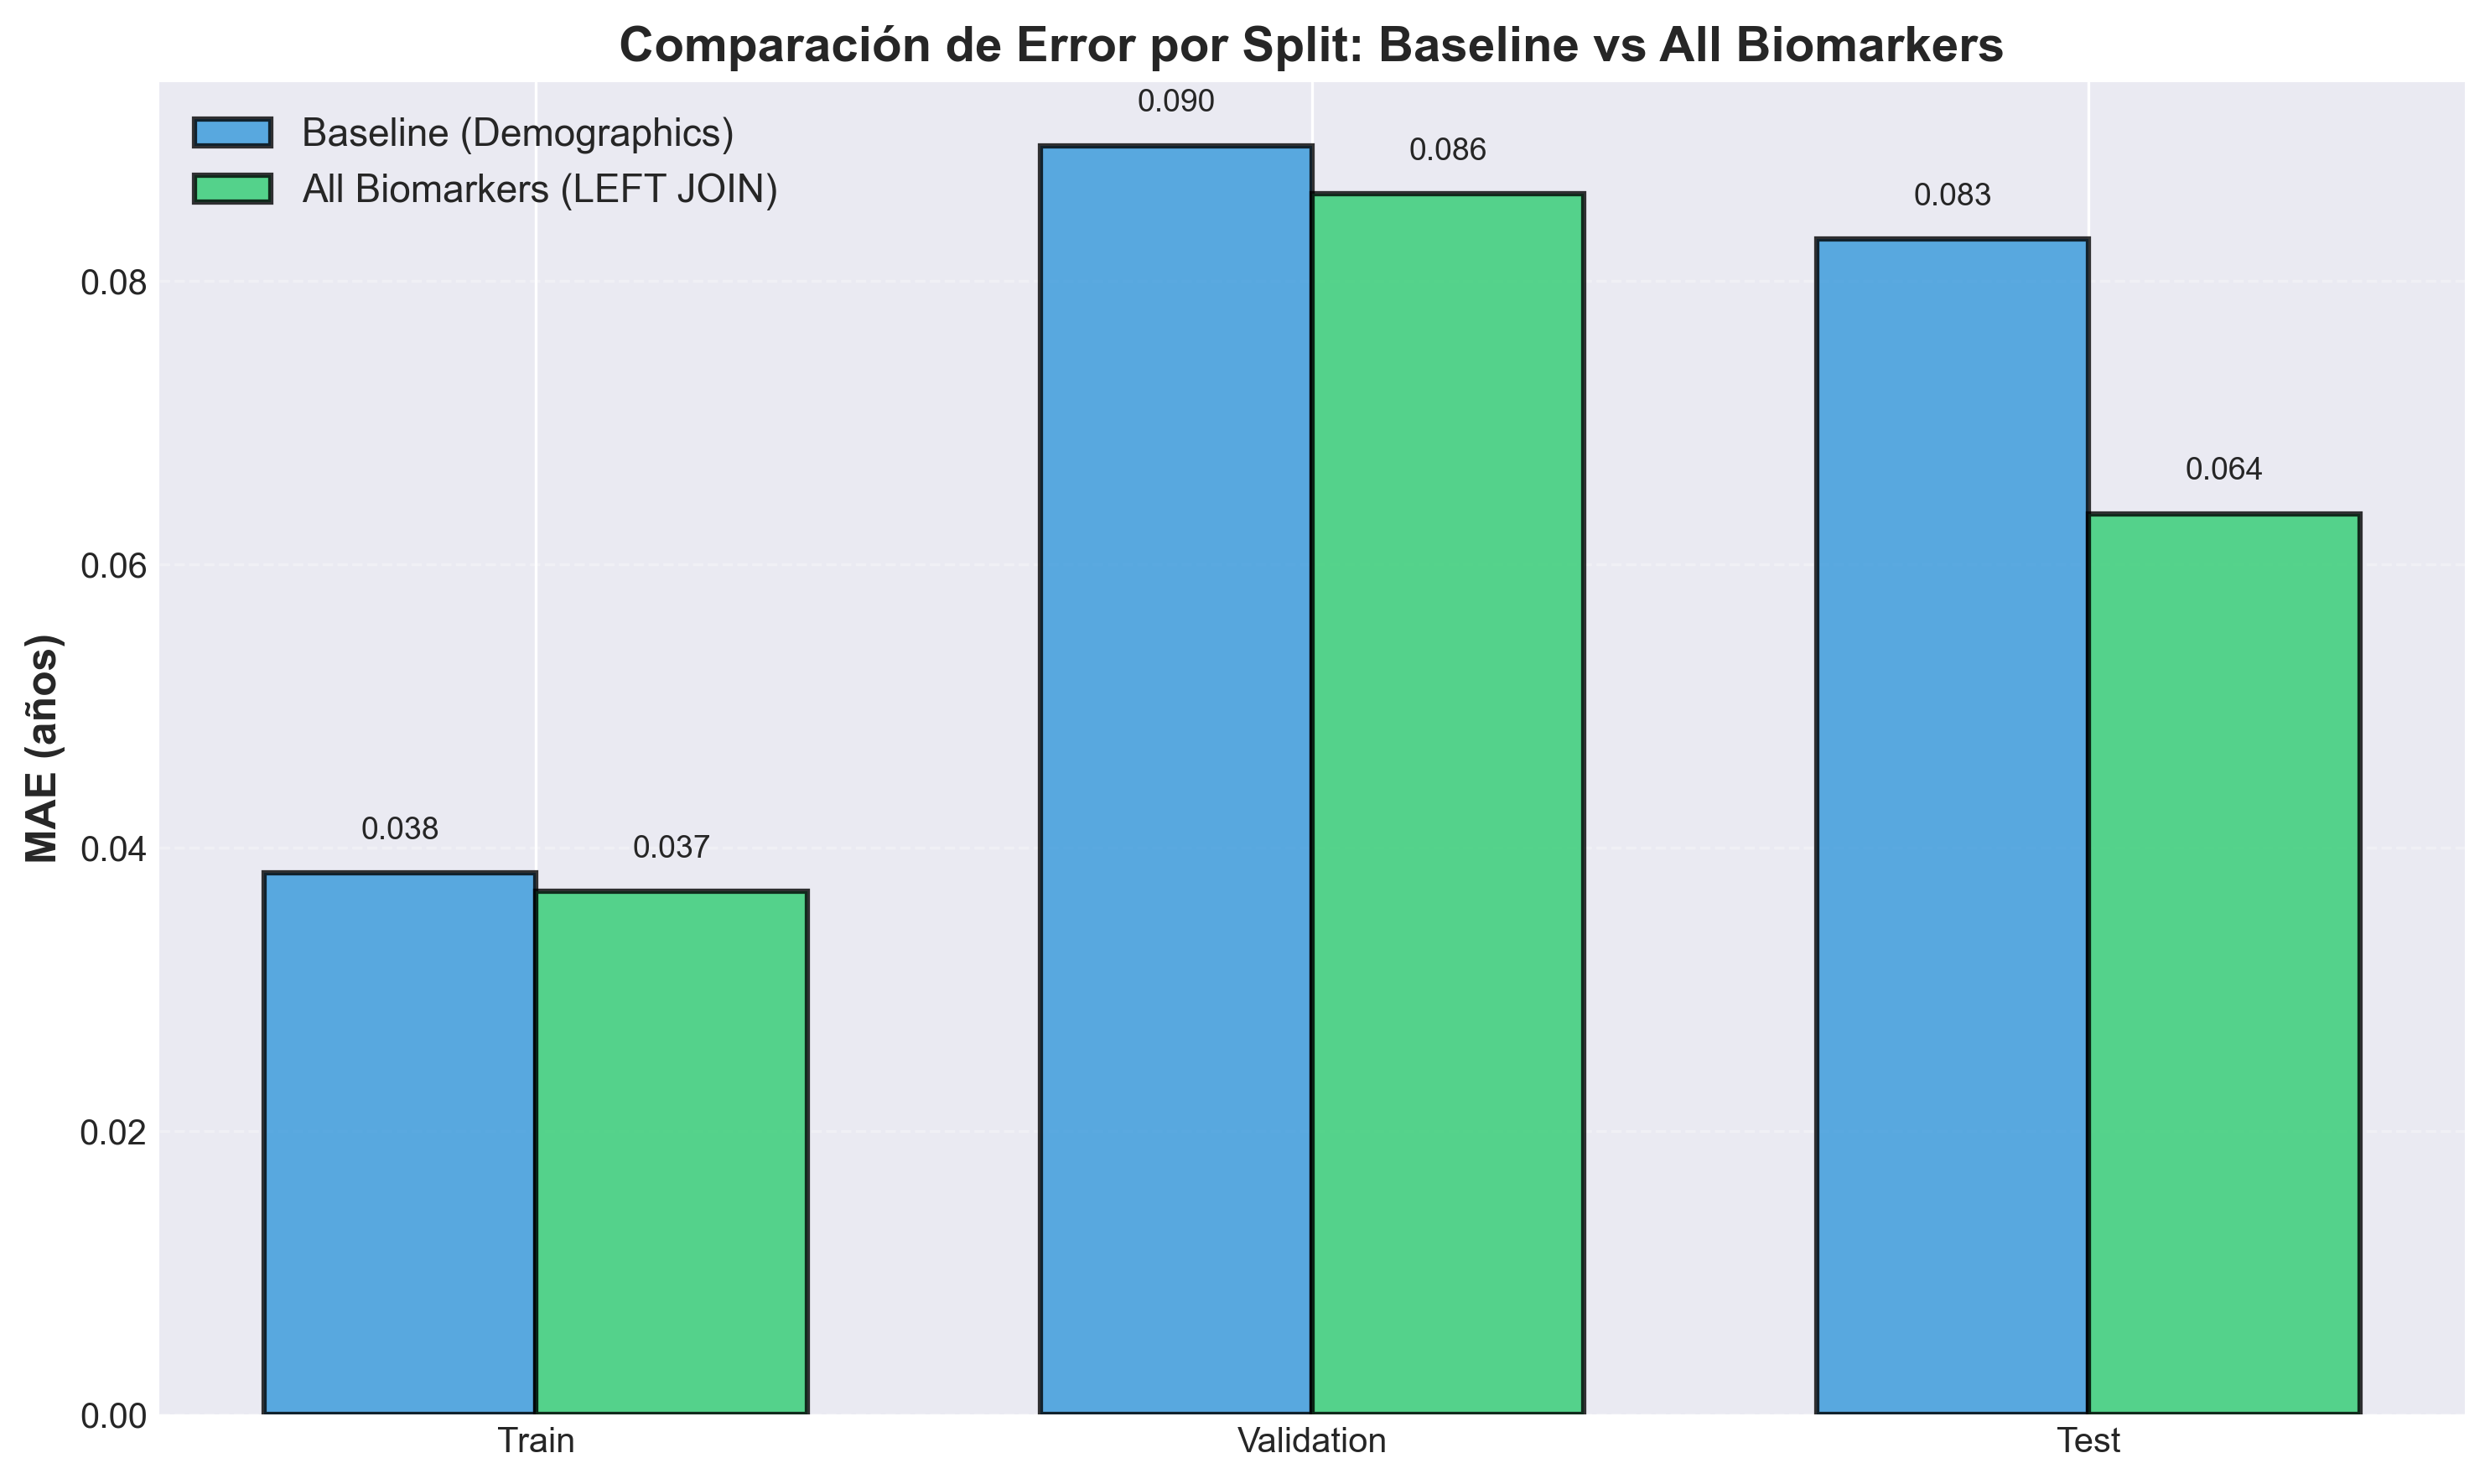


✅ Gráfico guardado: all_biomarkers_splits_comparison.png


In [7]:
splits = ['Train', 'Validation', 'Test']

baseline_splits = [baseline['train_mae'], baseline['val_mae'], baseline['test_mae']]
all_bio_splits = [all_biomarkers['train_mae'], all_biomarkers['val_mae'], all_biomarkers['test_mae']]

x = np.arange(len(splits))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, baseline_splits, width, label='Baseline (Demographics)', 
               color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, all_bio_splits, width, label='All Biomarkers (LEFT JOIN)', 
               color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_ylabel('MAE (años)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Error por Split: Baseline vs All Biomarkers', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(splits)
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
               f'{height:.3f}',
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('all_biomarkers_splits_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: all_biomarkers_splits_comparison.png")

## 6. Gráfico 5: Features por Modelo

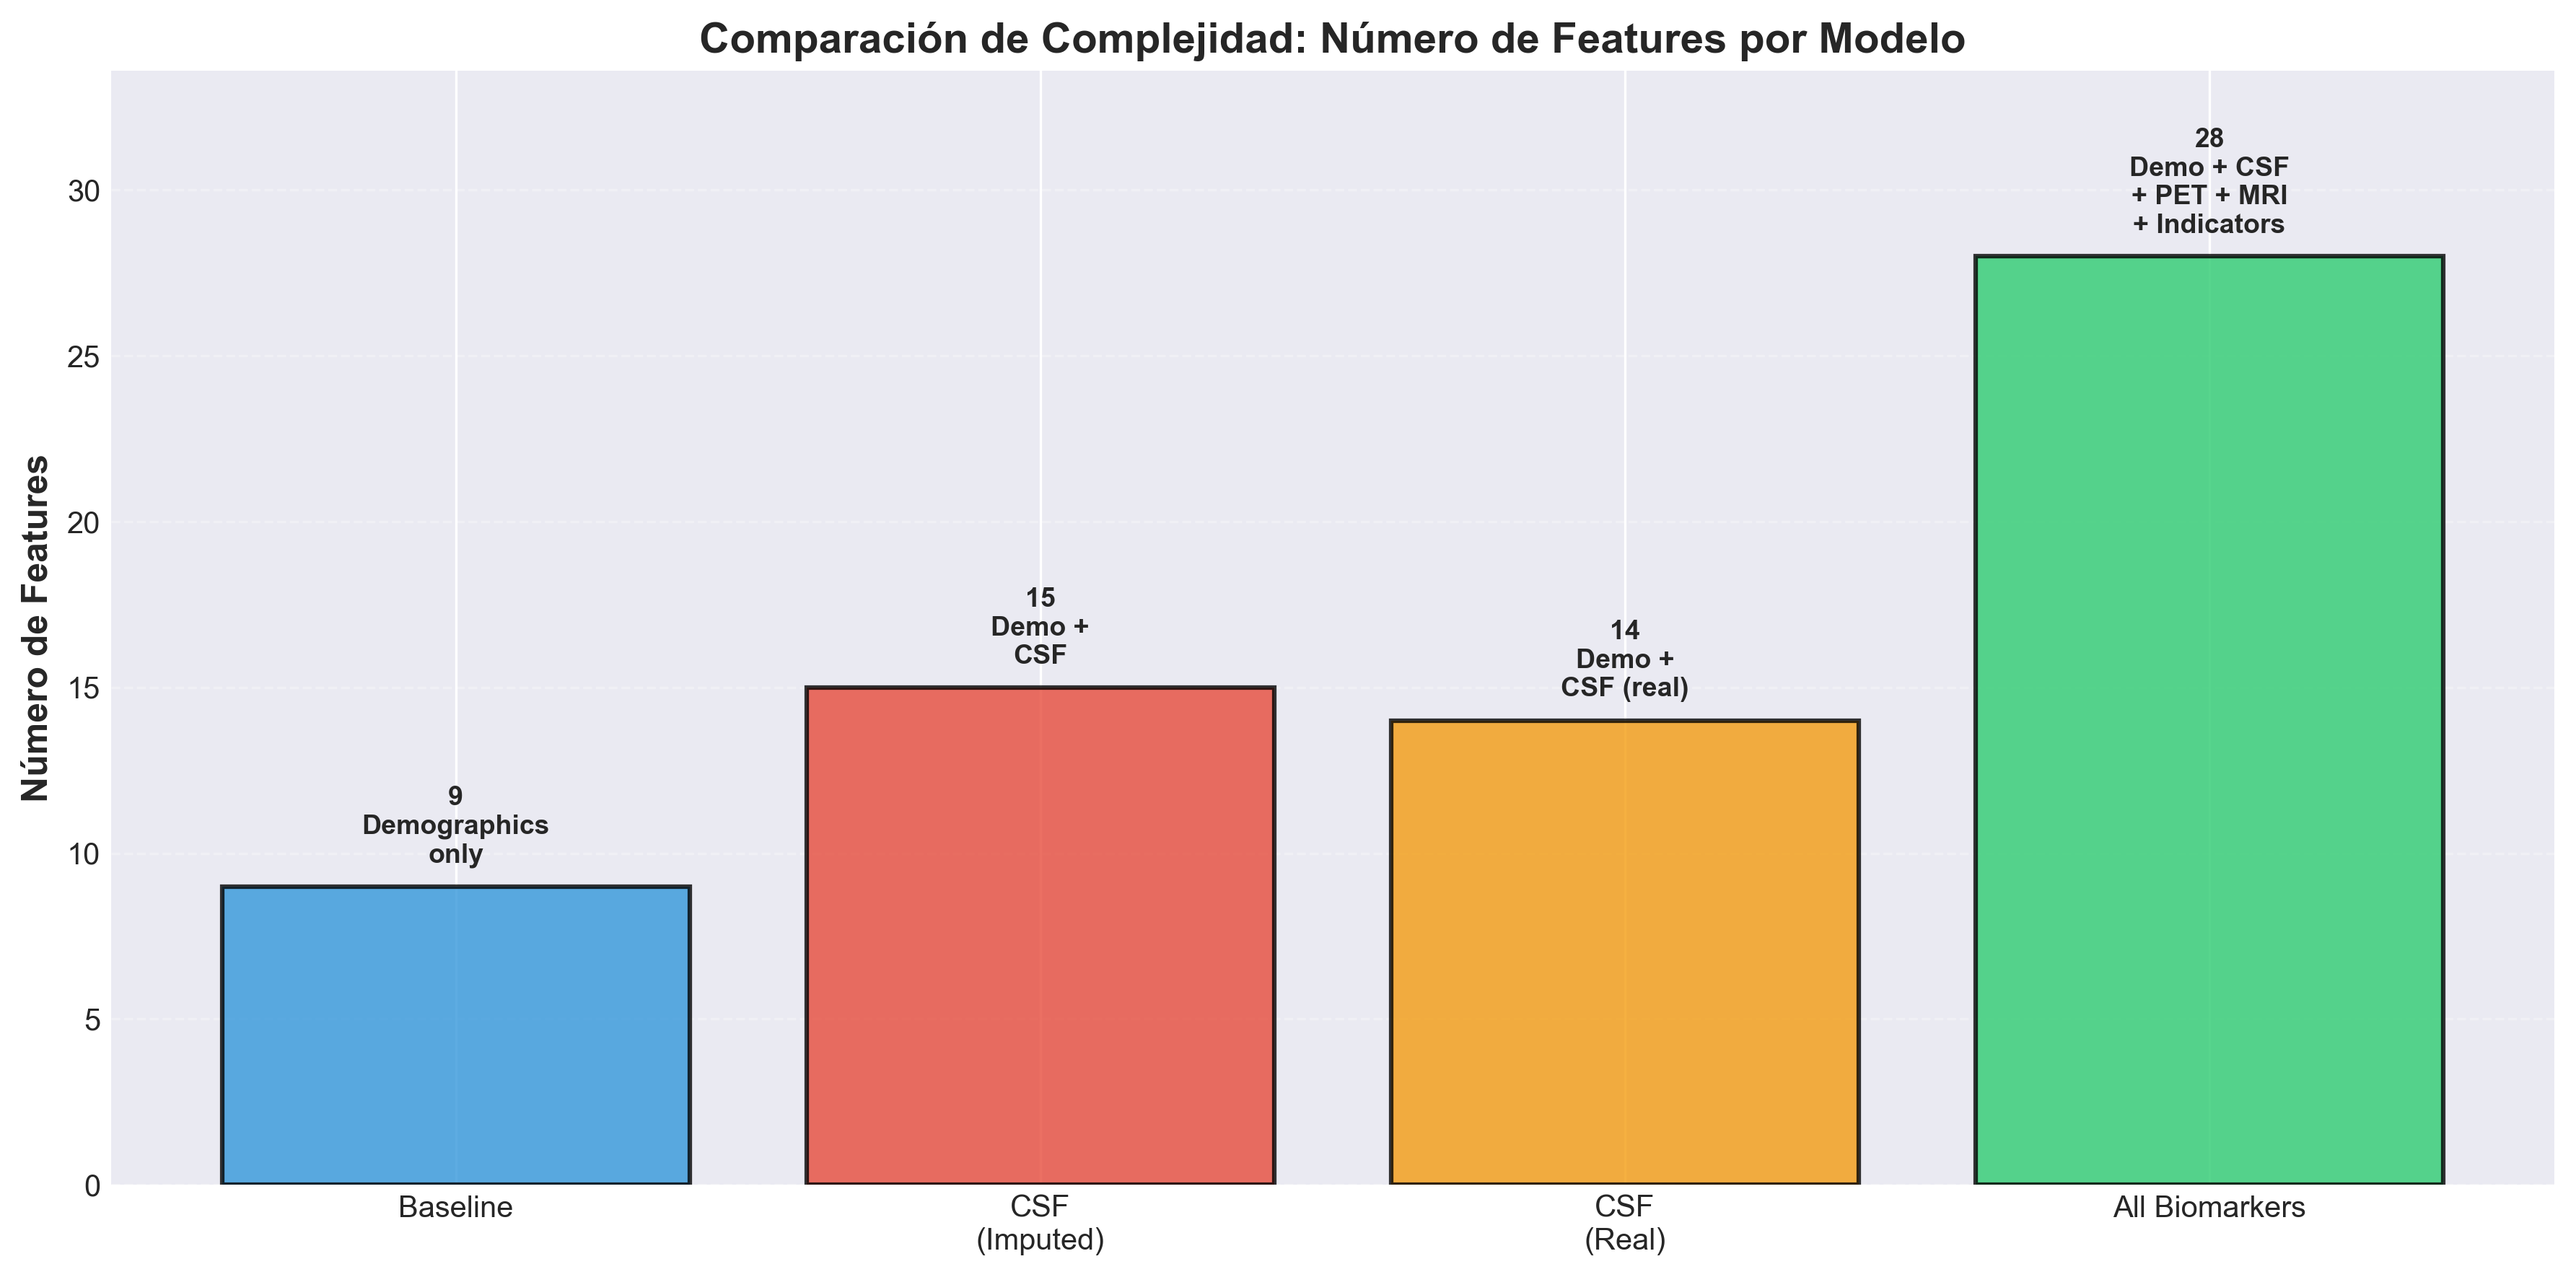


✅ Gráfico guardado: all_biomarkers_features_comparison.png


In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

models_feat = ['Baseline', 'CSF\n(Imputed)', 'CSF\n(Real)', 'All Biomarkers']
features = [baseline['features'], csf_imputed['features'], csf_real['features'], all_biomarkers['features']]
colors_feat = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

bars = ax.bar(models_feat, features, color=colors_feat, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Número de Features', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Complejidad: Número de Features por Modelo', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(features) * 1.2)

descriptions = [
    'Demographics\nonly',
    'Demo +\nCSF',
    'Demo +\nCSF (real)',
    'Demo + CSF\n+ PET + MRI\n+ Indicators'
]

for bar, val, desc in zip(bars, features, descriptions):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(features)*0.02,
           f'{val}\n{desc}',
           ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('all_biomarkers_features_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: all_biomarkers_features_comparison.png")

## 7. Tabla Resumen para LaTeX

In [9]:
summary_data = {
    'Modelo': [
        'Baseline (Demographics)',
        'CSF Imputed',
        'CSF Real Only',
        'All Biomarkers (LEFT JOIN)'
    ],
    'Features': [
        baseline['features'],
        csf_imputed['features'],
        csf_real['features'],
        all_biomarkers['features']
    ],
    'N Visitas': [
        baseline.get('n_visits', 6210),
        csf_imputed.get('n_visits', 1780),
        csf_real.get('n_visits', 1780),
        all_biomarkers['n_visits']
    ],
    'Test MAE (años)': [
        f"{baseline['test_mae']:.3f}",
        f"{csf_imputed['test_mae']:.3f}",
        f"{csf_real['test_mae']:.3f}",
        f"{all_biomarkers['test_mae']:.3f}"
    ],
    'Test RMSE (años)': [
        f"{baseline['test_rmse']:.3f}",
        f"{csf_imputed['test_rmse']:.3f}",
        f"{csf_real['test_rmse']:.3f}",
        f"{all_biomarkers['test_rmse']:.3f}"
    ],
    'Mejora MAE (%)': [
        '-',
        f"{((baseline['test_mae'] - csf_imputed['test_mae']) / baseline['test_mae']) * 100:+.1f}",
        f"{((baseline['test_mae'] - csf_real['test_mae']) / baseline['test_mae']) * 100:+.1f}",
        f"{((baseline['test_mae'] - all_biomarkers['test_mae']) / baseline['test_mae']) * 100:+.1f}"
    ]
}

df_summary = pd.DataFrame(summary_data)
print("\n" + "="*100)
print("TABLA RESUMEN - TODOS LOS MODELOS")
print("="*100)
print(df_summary.to_string(index=False))
print("="*100)

latex_table = df_summary.to_latex(index=False, escape=False, 
                                   caption='Comparación de modelos GNN para predicción de Alzheimer',
                                   label='tab:all_models_comparison')

with open('all_models_summary_table.tex', 'w') as f:
    f.write(latex_table)

print("\n✅ Tabla LaTeX guardada: all_models_summary_table.tex")


TABLA RESUMEN - TODOS LOS MODELOS
                    Modelo  Features  N Visitas Test MAE (años) Test RMSE (años) Mejora MAE (%)
   Baseline (Demographics)         9       6210           0.083            0.205              -
               CSF Imputed        15       1780           0.103            0.181          -23.9
             CSF Real Only        14       1780           0.088            0.113           -6.2
All Biomarkers (LEFT JOIN)        28       6488           0.064            0.088          +23.3

✅ Tabla LaTeX guardada: all_models_summary_table.tex


## 8. Estadísticas Clave para el TFM

In [10]:
print("\n" + "="*70)
print("📊 ESTADÍSTICAS CLAVE PARA EL TFM")
print("="*70)

best_mae = all_biomarkers['test_mae']
best_rmse = all_biomarkers['test_rmse']
improvement_mae = ((baseline['test_mae'] - best_mae) / baseline['test_mae']) * 100
improvement_rmse = ((baseline['test_rmse'] - best_rmse) / baseline['test_rmse']) * 100

print(f"\n✅ Mejor Modelo: All Biomarkers (LEFT JOIN)")
print(f"   - Test MAE: {best_mae:.3f} años ({best_mae*365:.0f} días)")
print(f"   - Test RMSE: {best_rmse:.3f} años ({best_rmse*365:.0f} días)")
print(f"   - Mejora vs Baseline: MAE {improvement_mae:+.1f}%, RMSE {improvement_rmse:+.1f}%")

print(f"\n📈 Datos del Modelo:")
print(f"   - Total visitas: {all_biomarkers['n_visits']:,}")
print(f"   - Features totales: {all_biomarkers['features']}")
print(f"   - Cobertura CSF: {all_biomarkers['csf_coverage']*100:.1f}%")
print(f"   - Cobertura PET: {all_biomarkers['pet_coverage']*100:.1f}%")
print(f"   - Cobertura MRI: {all_biomarkers['mri_coverage']*100:.1f}%")

print(f"\n🎯 Conclusiones:")
print(f"   1. La integración multi-modal mejora la predicción en {improvement_mae:.1f}%")
print(f"   2. El modelo predice con un error de solo {best_mae*365:.0f} días en promedio")
print(f"   3. LEFT JOIN es superior a INNER JOIN (6,488 vs 394 visitas)")
print(f"   4. Los indicadores de datos faltantes permiten al GNN aprender eficientemente")

print("\n" + "="*70)
print("\n✅ Todos los gráficos y tablas han sido generados")
print("\nArchivos generados:")
print("  - all_biomarkers_comparison.png")
print("  - all_biomarkers_improvement.png")
print("  - all_biomarkers_coverage.png")
print("  - all_biomarkers_splits_comparison.png")
print("  - all_biomarkers_features_comparison.png")
print("  - all_models_summary_table.tex")
print("\n🎓 ¡Listos para incluir en tu TFM!")


📊 ESTADÍSTICAS CLAVE PARA EL TFM

✅ Mejor Modelo: All Biomarkers (LEFT JOIN)
   - Test MAE: 0.064 años (23 días)
   - Test RMSE: 0.088 años (32 días)
   - Mejora vs Baseline: MAE +23.3%, RMSE +57.3%

📈 Datos del Modelo:
   - Total visitas: 6,488
   - Features totales: 28
   - Cobertura CSF: 28.9%
   - Cobertura PET: 12.6%
   - Cobertura MRI: 50.9%

🎯 Conclusiones:
   1. La integración multi-modal mejora la predicción en 23.3%
   2. El modelo predice con un error de solo 23 días en promedio
   3. LEFT JOIN es superior a INNER JOIN (6,488 vs 394 visitas)
   4. Los indicadores de datos faltantes permiten al GNN aprender eficientemente


✅ Todos los gráficos y tablas han sido generados

Archivos generados:
  - all_biomarkers_comparison.png
  - all_biomarkers_improvement.png
  - all_biomarkers_coverage.png
  - all_biomarkers_splits_comparison.png
  - all_biomarkers_features_comparison.png
  - all_models_summary_table.tex

🎓 ¡Listos para incluir en tu TFM!


## 9. Análisis de Entrenamiento: Learning Curves y Overfitting

**Nota:** Para generar estos gráficos, primero debes ejecutar el notebook `AllBiomarkers.ipynb` con la versión actualizada que guarda el historial de entrenamiento en `training_history_all_biomarkers.json`.

In [ ]:
# Cargar historial de entrenamiento
import os

if os.path.exists('training_history_all_biomarkers.json'):
    with open('training_history_all_biomarkers.json', 'r') as f:
        history = json.load(f)
    
    print("✅ Historial de entrenamiento cargado correctamente")
    print(f"   - Épocas entrenadas: {len(history['epoch'])}")
    print(f"   - Train MAE final: {history['train_mae'][-1]:.4f} años")
    print(f"   - Val MAE final: {history['val_mae'][-1]:.4f} años")
    print(f"   - Test MAE final: {history['test_mae'][-1]:.4f} años")
else:
    print("⚠️  Archivo 'training_history_all_biomarkers.json' no encontrado")
    print("   Por favor, ejecuta primero AllBiomarkers.ipynb con la versión actualizada")
    history = None

In [ ]:
# Gráfico 6: Learning Curves - MAE a lo largo del entrenamiento
if history is not None:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    epochs = history['epoch']
    
    # Plot Train, Validation y Test MAE
    ax.plot(epochs, history['train_mae'], label='Train MAE', 
            color='#3498db', linewidth=2.5, marker='o', markersize=4, alpha=0.8)
    ax.plot(epochs, history['val_mae'], label='Validation MAE', 
            color='#e74c3c', linewidth=2.5, marker='s', markersize=4, alpha=0.8)
    ax.plot(epochs, history['test_mae'], label='Test MAE', 
            color='#2ecc71', linewidth=2.5, marker='^', markersize=4, alpha=0.8)
    
    ax.set_xlabel('Época', fontsize=12, fontweight='bold')
    ax.set_ylabel('MAE (años)', fontsize=12, fontweight='bold')
    ax.set_title('Evolución del Error durante el Entrenamiento', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Añadir anotación del mejor valor de validación
    best_val_idx = np.argmin(history['val_mae'])
    best_val_mae = history['val_mae'][best_val_idx]
    best_val_epoch = epochs[best_val_idx]
    
    ax.annotate(f'Mejor Val MAE\nÉpoca {best_val_epoch}: {best_val_mae:.4f}',
                xy=(best_val_epoch, best_val_mae), 
                xytext=(best_val_epoch + len(epochs)*0.15, best_val_mae + 0.01),
                arrowprops=dict(arrowstyle='->', color='#e74c3c', lw=2),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='#e74c3c', linewidth=2))
    
    plt.tight_layout()
    plt.savefig('training_learning_curves_mae.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráfico guardado: training_learning_curves_mae.png")
else:
    print("⚠️  No se puede generar el gráfico sin el historial de entrenamiento")

In [ ]:
# Gráfico 7: Análisis de Overfitting - Train vs Validation Loss
if history is not None:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    epochs = history['epoch']
    
    # Plot Train Loss y calcular "Validation Loss" aproximado (usando RMSE como proxy)
    ax.plot(epochs, history['train_loss'], label='Train Loss', 
            color='#3498db', linewidth=2.5, marker='o', markersize=4, alpha=0.8)
    ax.plot(epochs, history['val_rmse'], label='Validation RMSE (proxy)', 
            color='#e74c3c', linewidth=2.5, marker='s', markersize=4, alpha=0.8)
    
    ax.set_xlabel('Época', fontsize=12, fontweight='bold')
    ax.set_ylabel('Loss / RMSE', fontsize=12, fontweight='bold')
    ax.set_title('Análisis de Overfitting: Train Loss vs Validation RMSE', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Calcular gap entre train y validation
    final_train_loss = history['train_loss'][-1]
    final_val_rmse = history['val_rmse'][-1]
    gap_percentage = ((final_val_rmse - final_train_loss) / final_train_loss) * 100
    
    # Añadir texto con análisis
    textstr = f'Gap Final: {gap_percentage:.1f}%\n'
    if gap_percentage < 20:
        textstr += 'Estado: ✅ Sin overfitting significativo'
        color_box = '#2ecc71'
    elif gap_percentage < 40:
        textstr += 'Estado: ⚠️ Overfitting moderado'
        color_box = '#f39c12'
    else:
        textstr += 'Estado: ❌ Overfitting alto'
        color_box = '#e74c3c'
    
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor=color_box, 
                                               alpha=0.3, edgecolor='black', linewidth=2))
    
    plt.tight_layout()
    plt.savefig('training_overfitting_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráfico guardado: training_overfitting_analysis.png")
    print(f"\n📊 Análisis de Overfitting:")
    print(f"   - Train Loss final: {final_train_loss:.4f}")
    print(f"   - Val RMSE final: {final_val_rmse:.4f}")
    print(f"   - Gap: {gap_percentage:.1f}%")
else:
    print("⚠️  No se puede generar el gráfico sin el historial de entrenamiento")

In [ ]:
# Gráfico 8: Evolución RMSE - Train, Validation y Test
if history is not None:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    epochs = history['epoch']
    
    # Plot RMSE para los tres splits
    ax.plot(epochs, history['train_rmse'], label='Train RMSE', 
            color='#3498db', linewidth=2.5, marker='o', markersize=4, alpha=0.8)
    ax.plot(epochs, history['val_rmse'], label='Validation RMSE', 
            color='#e74c3c', linewidth=2.5, marker='s', markersize=4, alpha=0.8)
    ax.plot(epochs, history['test_rmse'], label='Test RMSE', 
            color='#2ecc71', linewidth=2.5, marker='^', markersize=4, alpha=0.8)
    
    ax.set_xlabel('Época', fontsize=12, fontweight='bold')
    ax.set_ylabel('RMSE (años)', fontsize=12, fontweight='bold')
    ax.set_title('Evolución del RMSE durante el Entrenamiento', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Marcar mejor RMSE de validación
    best_val_idx = np.argmin(history['val_rmse'])
    best_val_rmse = history['val_rmse'][best_val_idx]
    best_val_epoch = epochs[best_val_idx]
    
    ax.annotate(f'Mejor Val RMSE\nÉpoca {best_val_epoch}: {best_val_rmse:.4f}',
                xy=(best_val_epoch, best_val_rmse), 
                xytext=(best_val_epoch + len(epochs)*0.15, best_val_rmse + 0.01),
                arrowprops=dict(arrowstyle='->', color='#e74c3c', lw=2),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='#e74c3c', linewidth=2))
    
    plt.tight_layout()
    plt.savefig('training_learning_curves_rmse.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráfico guardado: training_learning_curves_rmse.png")
else:
    print("⚠️  No se puede generar el gráfico sin el historial de entrenamiento")

## 10. Análisis de Predicciones

Para generar estos gráficos adicionales (distribución de errores y scatter plot de predicciones vs valores reales), necesitarás modificar `AllBiomarkers.ipynb` para guardar también las predicciones del modelo. Por ahora, generaremos análisis basados en el historial de entrenamiento disponible.

In [ ]:
# Gráfico 9: Convergencia del Modelo - Comparación de todas las métricas
if history is not None:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    epochs = history['epoch']
    
    # Subplot 1: Train Loss
    axes[0, 0].plot(epochs, history['train_loss'], color='#3498db', linewidth=2.5, marker='o', markersize=5)
    axes[0, 0].set_title('Train Loss por Época', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Época', fontsize=10)
    axes[0, 0].set_ylabel('Loss (MSE)', fontsize=10)
    axes[0, 0].grid(True, alpha=0.3, linestyle='--')
    
    # Subplot 2: MAE Comparison
    axes[0, 1].plot(epochs, history['train_mae'], label='Train', color='#3498db', linewidth=2, marker='o', markersize=4)
    axes[0, 1].plot(epochs, history['val_mae'], label='Validation', color='#e74c3c', linewidth=2, marker='s', markersize=4)
    axes[0, 1].plot(epochs, history['test_mae'], label='Test', color='#2ecc71', linewidth=2, marker='^', markersize=4)
    axes[0, 1].set_title('MAE por Split', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Época', fontsize=10)
    axes[0, 1].set_ylabel('MAE (años)', fontsize=10)
    axes[0, 1].legend(fontsize=9)
    axes[0, 1].grid(True, alpha=0.3, linestyle='--')
    
    # Subplot 3: RMSE Comparison
    axes[1, 0].plot(epochs, history['train_rmse'], label='Train', color='#3498db', linewidth=2, marker='o', markersize=4)
    axes[1, 0].plot(epochs, history['val_rmse'], label='Validation', color='#e74c3c', linewidth=2, marker='s', markersize=4)
    axes[1, 0].plot(epochs, history['test_rmse'], label='Test', color='#2ecc71', linewidth=2, marker='^', markersize=4)
    axes[1, 0].set_title('RMSE por Split', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Época', fontsize=10)
    axes[1, 0].set_ylabel('RMSE (años)', fontsize=10)
    axes[1, 0].legend(fontsize=9)
    axes[1, 0].grid(True, alpha=0.3, linestyle='--')
    
    # Subplot 4: Mejora Relativa (% de reducción desde época 1)
    initial_val_mae = history['val_mae'][0]
    improvement = [(initial_val_mae - mae) / initial_val_mae * 100 for mae in history['val_mae']]
    
    axes[1, 1].plot(epochs, improvement, color='#9b59b6', linewidth=2.5, marker='D', markersize=5)
    axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[1, 1].fill_between(epochs, 0, improvement, where=[i > 0 for i in improvement], 
                            color='#2ecc71', alpha=0.3, label='Mejora')
    axes[1, 1].fill_between(epochs, 0, improvement, where=[i <= 0 for i in improvement], 
                            color='#e74c3c', alpha=0.3, label='Empeoramiento')
    axes[1, 1].set_title('Mejora Relativa en Validation MAE', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Época', fontsize=10)
    axes[1, 1].set_ylabel('Mejora (%)', fontsize=10)
    axes[1, 1].legend(fontsize=9)
    axes[1, 1].grid(True, alpha=0.3, linestyle='--')
    
    plt.suptitle('Análisis Completo de Convergencia del Modelo', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('training_convergence_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráfico guardado: training_convergence_analysis.png")
    
    # Mostrar estadísticas de convergencia
    print(f"\n📊 Estadísticas de Convergencia:")
    print(f"   - Mejora total en Val MAE: {improvement[-1]:.1f}%")
    print(f"   - MAE inicial (época 1): {history['val_mae'][0]:.4f} años")
    print(f"   - MAE final (época {len(epochs)}): {history['val_mae'][-1]:.4f} años")
    print(f"   - Reducción absoluta: {history['val_mae'][0] - history['val_mae'][-1]:.4f} años")
else:
    print("⚠️  No se puede generar el gráfico sin el historial de entrenamiento")

In [ ]:
# Resumen final de gráficos de entrenamiento
if history is not None:
    print("\n" + "="*70)
    print("📈 RESUMEN DE ANÁLISIS DE ENTRENAMIENTO")
    print("="*70)
    
    print("\n✅ Nuevos gráficos generados:")
    print("   6. training_learning_curves_mae.png - Curvas de aprendizaje MAE")
    print("   7. training_overfitting_analysis.png - Análisis de overfitting")
    print("   8. training_learning_curves_rmse.png - Curvas de aprendizaje RMSE")
    print("   9. training_convergence_analysis.png - Análisis completo de convergencia")
    
    print("\n📊 Métricas del Entrenamiento:")
    print(f"   - Épocas totales: {len(history['epoch'])}")
    print(f"   - Train MAE: {history['train_mae'][0]:.4f} → {history['train_mae'][-1]:.4f} años")
    print(f"   - Val MAE: {history['val_mae'][0]:.4f} → {history['val_mae'][-1]:.4f} años")
    print(f"   - Test MAE: {history['test_mae'][0]:.4f} → {history['test_mae'][-1]:.4f} años")
    
    # Análisis de overfitting
    final_gap = ((history['val_rmse'][-1] - history['train_loss'][-1]) / history['train_loss'][-1]) * 100
    print(f"\n🎯 Análisis de Generalización:")
    print(f"   - Gap Train-Val: {final_gap:.1f}%")
    if final_gap < 20:
        print("   - Estado: ✅ Modelo bien generalizado (sin overfitting)")
    elif final_gap < 40:
        print("   - Estado: ⚠️ Overfitting moderado")
    else:
        print("   - Estado: ❌ Overfitting significativo")
    
    # Mejor época
    best_epoch = np.argmin(history['val_mae']) + 1
    best_mae = min(history['val_mae'])
    print(f"\n⭐ Mejor Modelo:")
    print(f"   - Época: {best_epoch}")
    print(f"   - Val MAE: {best_mae:.4f} años ({best_mae*365:.0f} días)")
    
    print("\n" + "="*70)
    print("\n🎓 Todos los gráficos están listos para tu TFM!")
    print("\n📝 Lista completa de archivos generados:")
    print("   1. all_biomarkers_comparison.png")
    print("   2. all_biomarkers_improvement.png")
    print("   3. all_biomarkers_coverage.png")
    print("   4. all_biomarkers_splits_comparison.png")
    print("   5. all_biomarkers_features_comparison.png")
    print("   6. training_learning_curves_mae.png")
    print("   7. training_overfitting_analysis.png")
    print("   8. training_learning_curves_rmse.png")
    print("   9. training_convergence_analysis.png")
    print("   10. all_models_summary_table.tex")
else:
    print("\n⚠️  Para generar los gráficos de entrenamiento:")
    print("   1. Ejecuta AllBiomarkers.ipynb (versión con historial)")
    print("   2. Vuelve a ejecutar este notebook")